In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Read The Data

In [2]:
data = pd.read_csv("Brain_GSE50161.csv")

In [3]:
data.head

<bound method NDFrame.head of      samples                   type  1007_s_at   1053_at     117_at    121_at  \
0        834             ependymoma  12.498150  7.604868   6.880934  9.027128   
1        835             ependymoma  13.067436  7.998090   7.209076  9.723322   
2        836             ependymoma  13.068179  8.573674   8.647684  9.613002   
3        837             ependymoma  12.456040  9.098977   6.628784  8.517677   
4        838             ependymoma  12.699958  8.800721  11.556188  9.166309   
..       ...                    ...        ...       ...        ...       ...   
125      959  pilocytic_astrocytoma  12.658228  8.843270   7.672655  9.125912   
126      960  pilocytic_astrocytoma  12.812823  8.510550   8.729699  9.104402   
127      961  pilocytic_astrocytoma  12.706991  8.795721   7.772359  8.327273   
128      962  pilocytic_astrocytoma  12.684593  8.293938   7.228186  8.494428   
129      963  pilocytic_astrocytoma  12.397722  8.843524   8.825100  8.551541  

# Convert Data Into Dataframe

In [4]:
# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Defining Features

In [5]:
#Defining X and y 
X = df.drop(['samples','type'], axis=1)
y = df['type']

# PCA

In [6]:
# Perform feature selection or dimensionality reduction (e.g., PCA)
pca = PCA(n_components=20)  # Choose number of principal components
X_reduced = pca.fit_transform(X)

# Sampling the Data

In [7]:
# Perform stratified sampling based on 'type' column
stratified_sampled_data = df.groupby('type', group_keys=False).apply(lambda x: x.sample(frac=0.3, random_state=42))

In [8]:
# Display the sampled data
print("Stratified Sampled Data:")
print(stratified_sampled_data)

Stratified Sampled Data:
     samples                   type  1007_s_at    1053_at     117_at  \
39       873             ependymoma  12.416188   9.079116   8.335810   
25       859             ependymoma  12.680754   8.311863   7.571993   
26       860             ependymoma  12.965147   8.438010   7.058539   
44       878             ependymoma  12.645764   8.406188   7.321294   
35       869             ependymoma  12.506887   8.855623   8.773573   
41       875             ependymoma  12.257282   8.549419   9.176255   
4        838             ependymoma  12.699958   8.800721  11.556188   
12       846             ependymoma  12.545334   8.413482   7.250554   
8        842             ependymoma  12.463229   8.206494   8.891218   
3        837             ependymoma  12.456040   9.098977   6.628784   
6        840             ependymoma  13.655639   7.980903   7.566620   
24       858             ependymoma  12.885818   8.678978   7.590987   
32       866             ependymoma  12

In [9]:
# Count the frequency of each cancer type in the 'type' column
cancer_type_counts = df['type'].value_counts()
print(cancer_type_counts)

type
ependymoma               46
glioblastoma             34
medulloblastoma          22
pilocytic_astrocytoma    15
normal                   13
Name: count, dtype: int64


# Plotting Bar Graph

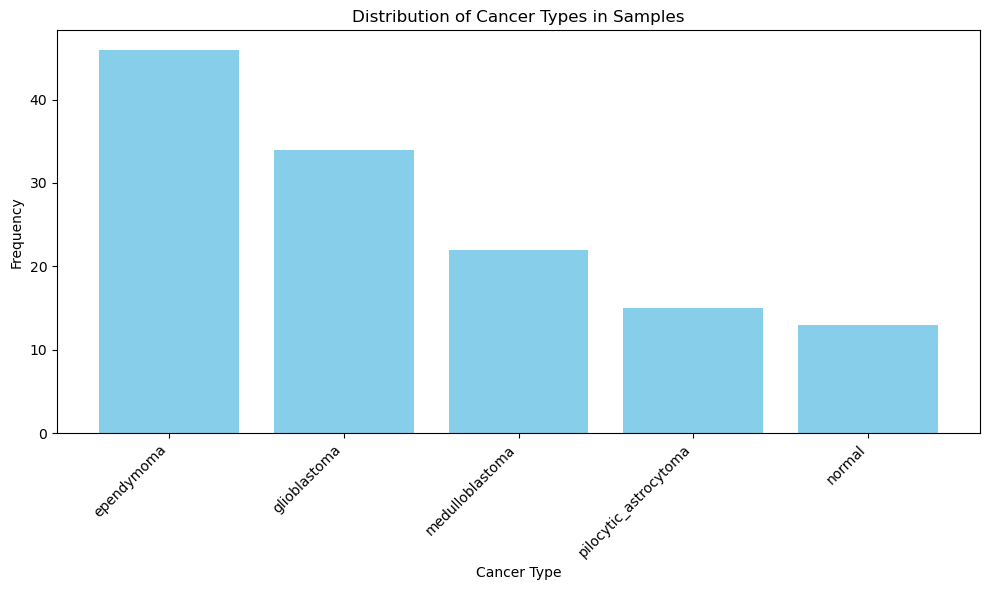

In [10]:
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)
plt.bar(cancer_type_counts.index, cancer_type_counts.values, color='skyblue')  # Create a bar plot
plt.title('Distribution of Cancer Types in Samples')  # Set the plot title
plt.xlabel('Cancer Type')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot

In [11]:
# Drop any rows with missing values
df.dropna(inplace=True)

In [12]:
df# Create a LabelEncoder object
label_encoder = LabelEncoder()

In [13]:
df['type'] = label_encoder.fit_transform(df['type'])

# Plot for Three random genes

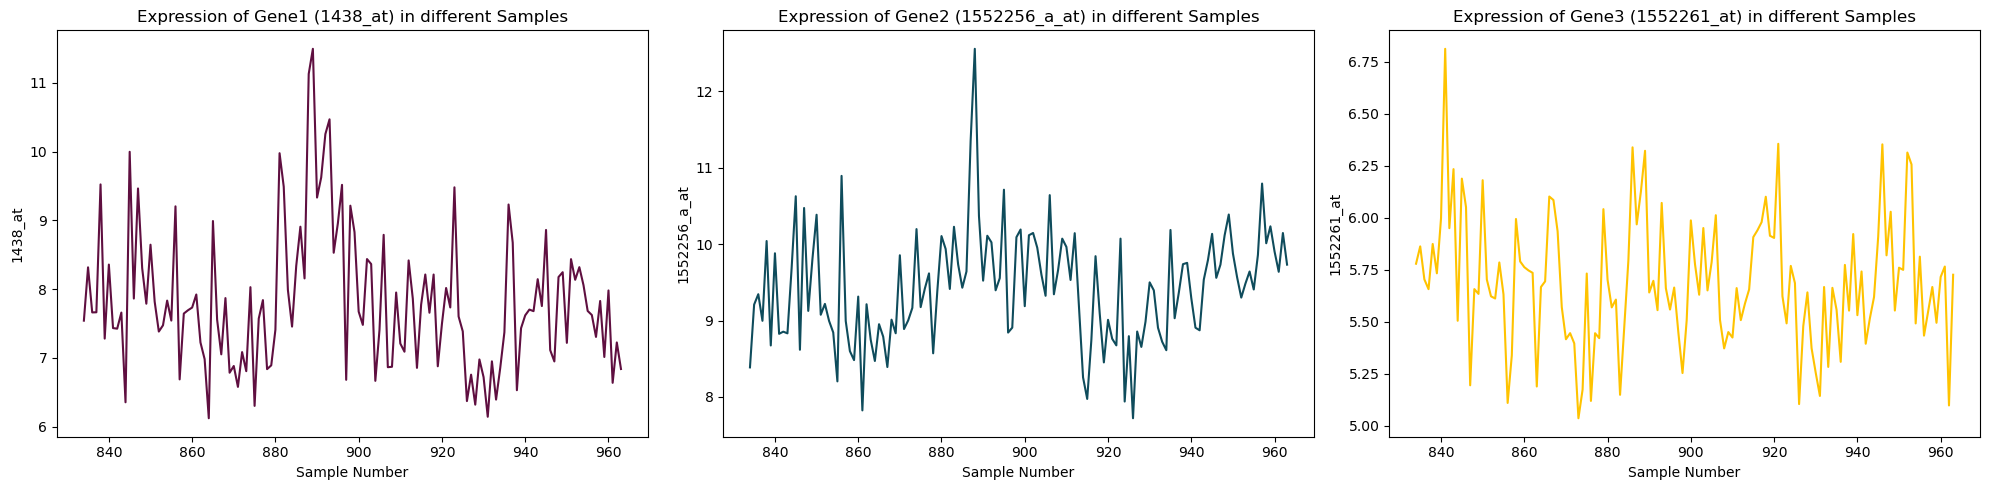

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Plot for Gene1 (1438_at)
sns.lineplot(x='samples', y='1438_at', data=data, color="#5f0f40", ax=axes[0])
axes[0].set_title("Expression of Gene1 (1438_at) in different Samples")
axes[0].set_xlabel("Sample Number")

# Plot for Gene2 (1552256_a_at)
sns.lineplot(x='samples', y='1552256_a_at', data=data, color="#0f4c5c", ax=axes[1])
axes[1].set_title("Expression of Gene2 (1552256_a_at) in different Samples")
axes[1].set_xlabel("Sample Number")

# Plot for Gene3 (1552261_at)
sns.lineplot(x='samples', y='1552261_at', data=data, color="#FFC300", ax=axes[2])
axes[2].set_title("Expression of Gene3 (1552261_at) in different Samples")
axes[2].set_xlabel("Sample Number")

plt.tight_layout()
plt.show()

In [15]:
kind_of_cancer = df['type'].value_counts().to_frame()
kind_of_cancer

,count
type,
0,46
1,34
2,22
4,15
3,13


# Types of Cancer 

Text(0.5, 1.0, 'Kinds of Brain Cancers')

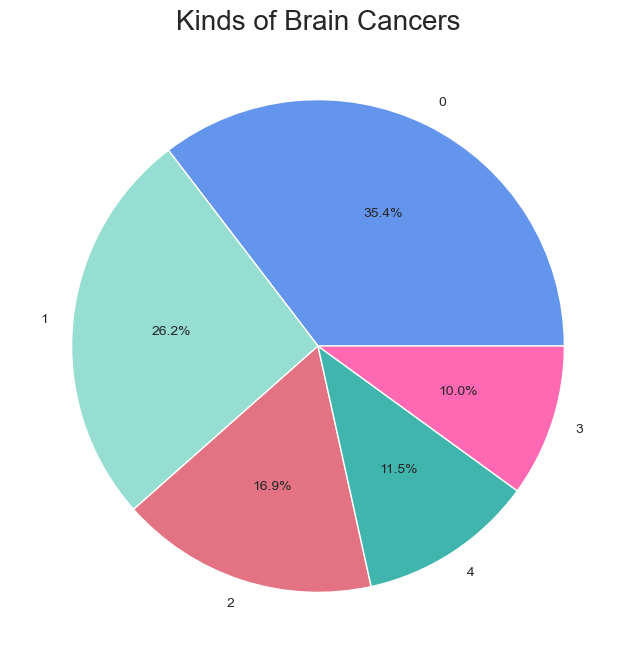

In [16]:
colors = ['#6495ED','#96DED1','#E37383','#40B5AD','#FF69B4']
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,8)
plt.pie(kind_of_cancer['count'],labels=kind_of_cancer.index,autopct='%1.1f%%',colors=colors)
plt.title("Kinds of Brain Cancers",fontsize=20)

In [17]:
# Apply t-SNE for dimensionality reduction (2D)
tsne = TSNE(n_components=2,perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualization of Gene Expression Data

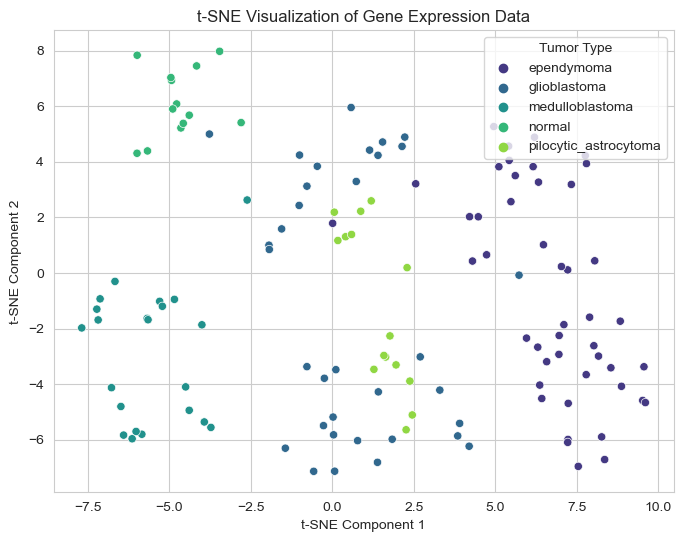

In [18]:
# Visualize t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='viridis')
plt.title('t-SNE Visualization of Gene Expression Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Tumor Type', loc='best')
plt.show()

In [19]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest classifier

In [21]:
# Define the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

In [22]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required at each leaf node
}

In [23]:
# Perform Grid Search CV for Random Forest
grid_search_rf = GridSearchCV(rf, param_grid=param_grid_rf, cv=4, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [24]:
# Get the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_


In [25]:
# Evaluate the best Random Forest model on the scaled test set
y_pred_rf = best_rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [26]:
print(f"Random Forest - Best Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest - Best Parameters: {grid_search_rf.best_params_}")

Random Forest - Best Accuracy: 0.92
Random Forest - Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [27]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Confusion Matrix:
[[10  1  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0  1  0]
 [ 0  1  0  0  2]]


In [28]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:
                       precision    recall  f1-score   support

           ependymoma       1.00      0.91      0.95        11
         glioblastoma       0.67      1.00      0.80         4
      medulloblastoma       1.00      1.00      1.00         7
               normal       1.00      1.00      1.00         1
pilocytic_astrocytoma       1.00      0.67      0.80         3

             accuracy                           0.92        26
            macro avg       0.93      0.92      0.91        26
         weighted avg       0.95      0.92      0.93        26



In [33]:
def plot_actual_vs_predicted(feature, y_actual, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(feature, y_actual, color='green', marker='o', label='Actual Values')
    plt.scatter(feature, y_pred, color='blue', marker='x', label='Predicted Values')
    plt.xlabel(feature.name)
    plt.ylabel('Cancer Subtypes')
    plt.title(f'{model_name}: Actual vs Predicted')
    plt.legend()
    plt.grid(True)  # Adding grid
    plt.show()

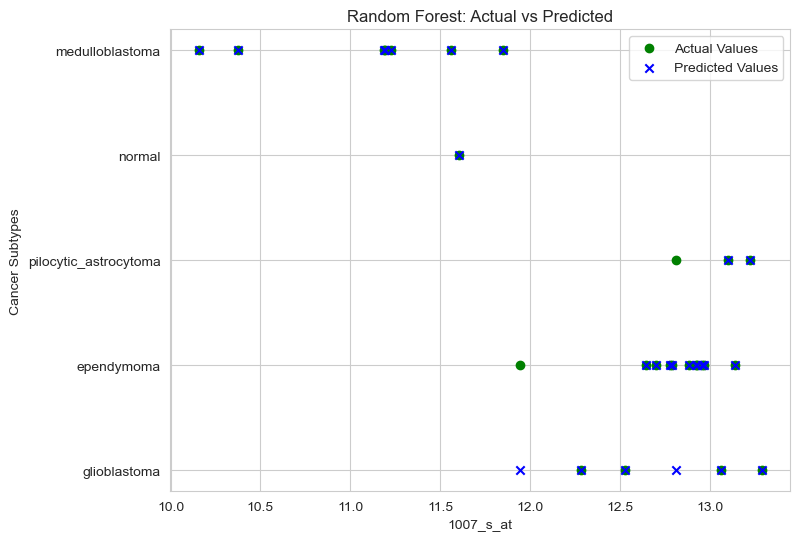

In [39]:
plot_actual_vs_predicted(X_test['1007_s_at'], y_test, y_pred_rf, 'Random Forest')

# SVM classifier

In [40]:
# Define the SVM classifier
svm = SVC(random_state=42)


In [41]:
# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],                # Regularization parameter
    'gamma': ['scale', 'auto'],       # Kernel coefficient
    'kernel': ['linear', 'rbf']       # Kernel type
}

In [42]:
# Perform Grid Search CV for SVM
grid_search_svm = GridSearchCV(svm, param_grid=param_grid_svm, cv=4, scoring='accuracy')
grid_search_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=4, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [43]:
# Get the best SVM model
best_svm_model = grid_search_svm.best_estimator_

In [44]:
# Evaluate the best SVM model on the scaled test set
y_pred_svm = best_svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [45]:
print(f"SVM - Best Accuracy: {accuracy_svm:.2f}")
print(f"SVM - Best Parameters: {grid_search_svm.best_params_}")

SVM - Best Accuracy: 0.92
SVM - Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [46]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


Classification Report:
                       precision    recall  f1-score   support

           ependymoma       1.00      0.91      0.95        11
         glioblastoma       0.67      1.00      0.80         4
      medulloblastoma       1.00      1.00      1.00         7
               normal       1.00      1.00      1.00         1
pilocytic_astrocytoma       1.00      0.67      0.80         3

             accuracy                           0.92        26
            macro avg       0.93      0.92      0.91        26
         weighted avg       0.95      0.92      0.93        26



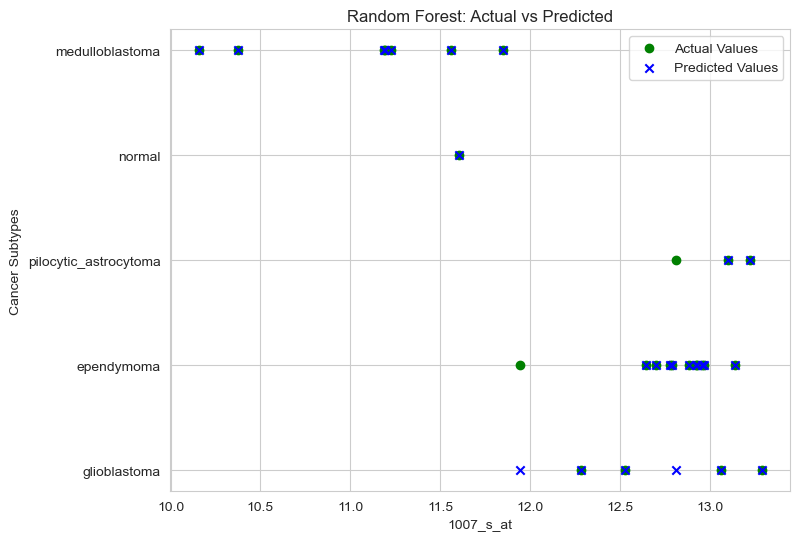

In [47]:
plot_actual_vs_predicted(X_test['1007_s_at'], y_test, y_pred_svm, 'Random Forest')

# Logistic Regression classifier

In [48]:
# Define Logistic Regression classifier
logreg = LogisticRegression(random_state=42,max_iter=1000)

In [49]:
# Define parameter grid for hyperparameter tuning
param_grid_logreg = {
        'penalty': ['l2'],
        'C': [0.1, 1.0, 10.0]
    } 

In [50]:
# Perform Grid Search CV for LogReg
grid_search_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid_logreg, cv=4, scoring='accuracy')
grid_search_logreg.fit(X_train_scaled, y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.1, 1.0, 10.0], 'penalty': ['l2']},
             scoring='accuracy')

In [51]:
# Get the best  model
best_logreg_model = grid_search_logreg.best_estimator_

In [52]:
# Evaluate the best SVM model on the scaled test set
y_pred_logreg = best_logreg_model.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

In [53]:
print(f"LogReg - Best Accuracy: {accuracy_logreg:.2f}")
print(f"LogReg - Best Parameters: {grid_search_logreg.best_params_}")

LogReg - Best Accuracy: 0.96
LogReg - Best Parameters: {'C': 10.0, 'penalty': 'l2'}


In [54]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))


Classification Report:
                       precision    recall  f1-score   support

           ependymoma       0.92      1.00      0.96        11
         glioblastoma       1.00      1.00      1.00         4
      medulloblastoma       1.00      1.00      1.00         7
               normal       1.00      1.00      1.00         1
pilocytic_astrocytoma       1.00      0.67      0.80         3

             accuracy                           0.96        26
            macro avg       0.98      0.93      0.95        26
         weighted avg       0.96      0.96      0.96        26



In [ ]:
plot_actual_vs_predicted(X_test['1007_s_at'], y_test, y_pred_rf, 'Random Forest')

# KN classifier

In [ ]:
# Define KN classifier
KN = KNeighborsClassifier()

In [ ]:
# Define parameter grid for K Nearest Neighbour
param_grid_logreg = {
        'n_neighbors': [4, 6, 8],
        'weights': ['uniform', 'distance']
}

In [ ]:
# Perform Grid Search CV for KN
grid_search_KN = GridSearchCV(KN, param_grid=param_grid_logreg, cv=4, scoring='accuracy')
grid_search_KN.fit(X_train_scaled, y_train)

In [ ]:
# Get the best  model
best_KN_model = grid_search_KN.best_estimator_

In [ ]:
# Evaluate the best SVM model on the scaled test set
y_pred_KN = best_KN_model.predict(X_test_scaled)
accuracy_KN = accuracy_score(y_test, y_pred_KN)

In [ ]:
print(f"K Nearest Neighbour - Best Accuracy: {accuracy_KN:.2f}")
print(f"K Nearest Neighbour - Best Parameters: {grid_search_KN.best_params_}")

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_KN))

# Best of All Classifiers

In [ ]:
accuracy_scores = {
    'Logistic Regression': accuracy_logreg,
    'Random Forest':accuracy_rf ,
    'Support Vector Machine':accuracy_svm,
    'K-Nearest Neighbors':accuracy_KN
}

# Find the classifier with the highest accuracy
best_classifier = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_classifier]

print("Classifier with the Best Accuracy:", best_classifier)
print("Best Accuracy Score:", best_accuracy)


In [ ]:
class_names = ['No', 'S', 'V', 'F', 'Q']
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='rainbow', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()